In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [9]:
df = pd.read_excel('threads{0}.xlsx'.format(1), header=1)
for i in [2, 3, 4, 8, 16]:
    df = pd.concat((df, pd.read_excel('threads{0}.xlsx'.format(i), header=1)), axis=0)
    
df.reset_index(inplace=True, drop=True)
df['Benchmark'] = df['Benchmark'].apply(lambda x: x.strip())

In [20]:
df['Benchmark'][64]

'CounterBenchmarkTest.MutexCounter:testMutexCounterGetValue'

In [17]:
df[df['Benchmark'] == 'CounterBenchmarkTest.MutexCounter']['Score'].values

array([1.04826200e+08, 1.60655795e+08, 3.21371291e+08, 3.23439223e+08,
       2.24516437e+08, 3.81778110e+08])

In [18]:
df[df['Benchmark'] == 'CounterBenchmarkTest.MutexCounter']['Error'].values

array([3.59529091e+06, 1.11515304e+08, 7.50386151e+07, 3.39701268e+07,
       7.72233236e+07, 3.90267379e+07])

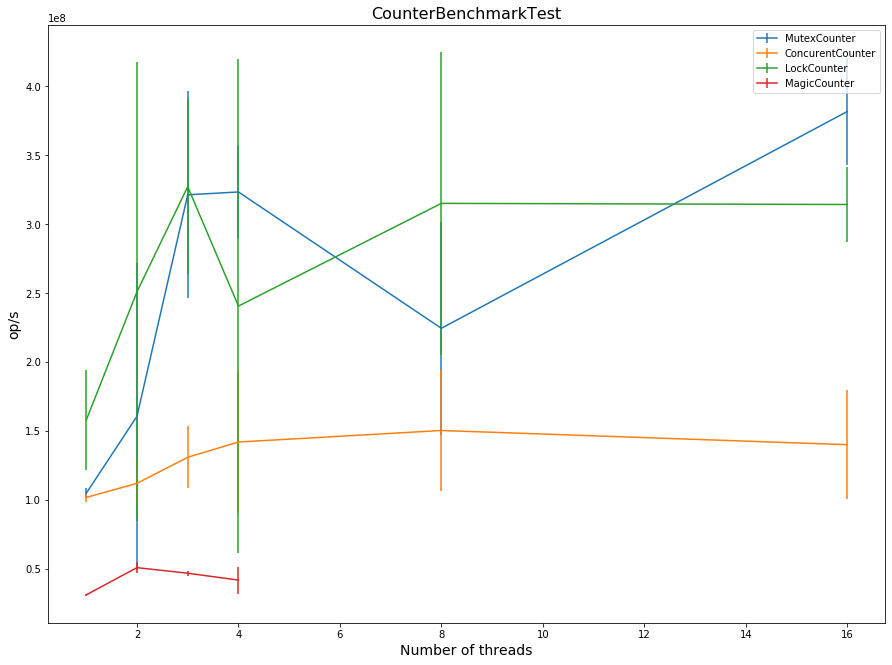

In [21]:
plt.figure(figsize=(15,11))
plt.title('CounterBenchmarkTest', fontsize=16)
plt.xlabel('Number of threads', fontsize=14)
plt.ylabel('op/s', fontsize=14)
a = plt.errorbar([1, 2, 3, 4, 8, 16], df[df['Benchmark'] == 'CounterBenchmarkTest.MutexCounter']['Score'].values, df[df['Benchmark'] == 'CounterBenchmarkTest.MutexCounter']['Error'].values)
b = plt.errorbar([1, 2, 3, 4, 8, 16], df[df['Benchmark'] == 'CounterBenchmarkTest.ConcurentCounter']['Score'].values, df[df['Benchmark'] == 'CounterBenchmarkTest.ConcurentCounter']['Error'].values)
c = plt.errorbar([1, 2, 3, 4, 8, 16], df[df['Benchmark'] == 'CounterBenchmarkTest.LockCounter']['Score'].values, df[df['Benchmark'] == 'CounterBenchmarkTest.LockCounter']['Error'].values)
d = plt.errorbar([1, 2, 3, 4], df[df['Benchmark'] == 'CounterBenchmarkTest.MagicCounter']['Score'].values, df[df['Benchmark'] == 'CounterBenchmarkTest.MagicCounter']['Error'].values)
plt.legend((a, b, c, d), ('MutexCounter', 'ConcurentCounter', 'LockCounter', 'MagicCounter'))

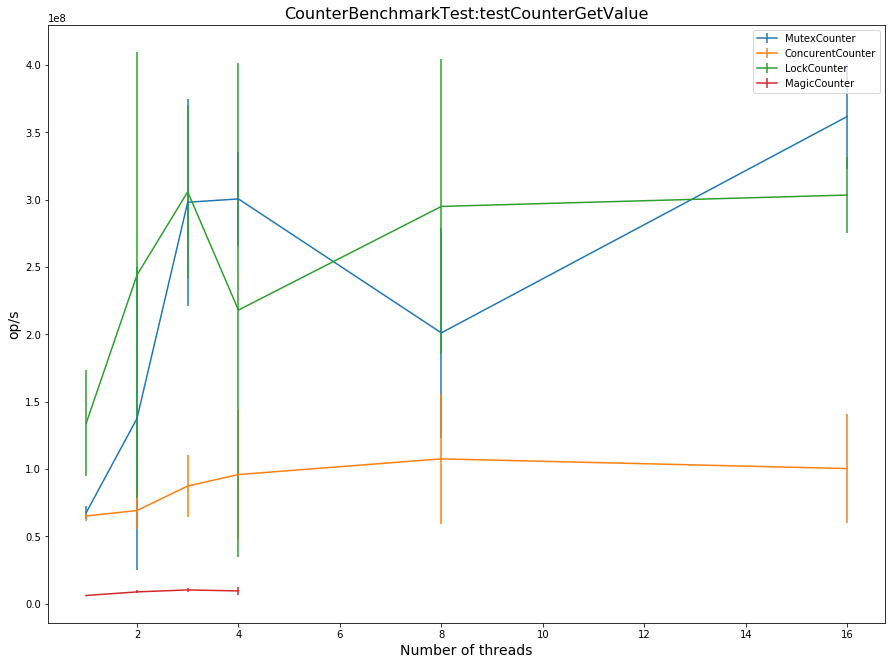

In [22]:
plt.figure(figsize=(15,11))
plt.title('CounterBenchmarkTest:testCounterGetValue', fontsize=16)
plt.xlabel('Number of threads', fontsize=14)
plt.ylabel('op/s', fontsize=14)
a = plt.errorbar([1, 2, 3, 4, 8, 16], df[df['Benchmark'] == 'CounterBenchmarkTest.MutexCounter:testMutexCounterGetValue']['Score'].values, df[df['Benchmark'] == 'CounterBenchmarkTest.MutexCounter:testMutexCounterGetValue']['Error'].values)
b = plt.errorbar([1, 2, 3, 4, 8, 16], df[df['Benchmark'] == 'CounterBenchmarkTest.ConcurentCounter:testConcurentCounterGetValue']['Score'].values, df[df['Benchmark'] == 'CounterBenchmarkTest.ConcurentCounter:testConcurentCounterGetValue']['Error'].values)
c = plt.errorbar([1, 2, 3, 4, 8, 16], df[df['Benchmark'] == 'CounterBenchmarkTest.LockCounter:testLockCounterGetValue']['Score'].values, df[df['Benchmark'] == 'CounterBenchmarkTest.LockCounter:testLockCounterGetValue']['Error'].values)
d = plt.errorbar([1, 2, 3, 4], df[df['Benchmark'] == 'CounterBenchmarkTest.MagicCounter:testMagicCounterGetValue']['Score'].values, df[df['Benchmark'] == 'CounterBenchmarkTest.MagicCounter:testMagicCounterGetValue']['Error'].values)
plt.legend((a, b, c, d), ('MutexCounter', 'ConcurentCounter', 'LockCounter', 'MagicCounter'))

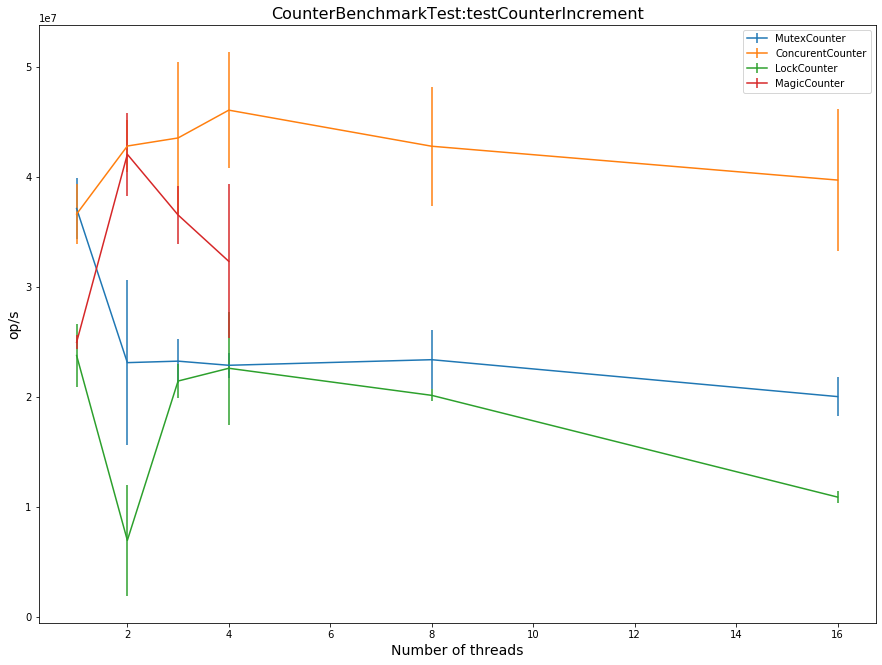

In [24]:
plt.figure(figsize=(15,11))
plt.title('CounterBenchmarkTest:testCounterIncrement', fontsize=16)
plt.xlabel('Number of threads', fontsize=14)
plt.ylabel('op/s', fontsize=14)
a = plt.errorbar([1, 2, 3, 4, 8, 16], df[df['Benchmark'] == 'CounterBenchmarkTest.MutexCounter:testMutexCounterIncrement']['Score'].values, df[df['Benchmark'] == 'CounterBenchmarkTest.MutexCounter:testMutexCounterIncrement']['Error'].values)
b = plt.errorbar([1, 2, 3, 4, 8, 16], df[df['Benchmark'] == 'CounterBenchmarkTest.ConcurentCounter:testConcurentCounterIncrement']['Score'].values, df[df['Benchmark'] == 'CounterBenchmarkTest.ConcurentCounter:testConcurentCounterIncrement']['Error'].values)
c = plt.errorbar([1, 2, 3, 4, 8, 16], df[df['Benchmark'] == 'CounterBenchmarkTest.LockCounter:testLockCounterIncrement']['Score'].values, df[df['Benchmark'] == 'CounterBenchmarkTest.LockCounter:testLockCounterIncrement']['Error'].values)
d = plt.errorbar([1, 2, 3, 4], df[df['Benchmark'] == 'CounterBenchmarkTest.MagicCounter:testMagicCounterIncrement']['Score'].values, df[df['Benchmark'] == 'CounterBenchmarkTest.MagicCounter:testMagicCounterIncrement']['Error'].values)
plt.legend((a, b, c, d), ('MutexCounter', 'ConcurentCounter', 'LockCounter', 'MagicCounter'))

Выводы : на вормапе и на getValue видно что лок каунтер и мъютекс примерно ведут себя одинаково, а на инкременте проседают конкретно. мэджик дает дичь какуюто-полнейшую и примерно для всех тестов одинаково работает. А вот конкарент на вормапе и на getValue на дне, зато на инкременте самого лучшего результата достигает, видимо из-за какой-то своей реализации метода .add у атомик лонга.
